# Load HDF5 dataset

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt


path = 'path_to_your_femnist.hdf5'
file = h5py.File(path, "r")

writers = sorted(file.keys())
print(f'datasets contains images from {len(writers)} writers')

datasets contains images from 3580 writers


# Explore basic properties of the subdataset

In [5]:
w0_images = file[writers[0]]['images'][:]
w0_labels = file[writers[0]]['labels'][:]
classes, counts = np.unique(w0_labels, return_counts=True)
print(f'writer 0 has {len(w0_images)} images')
print(f'writer 0 has {len(classes)} classes')
print(f'writer 0 has {counts} images per class')

writer 0 has 104 images
writer 0 has 10 classes
writer 0 has [12 11 11 12  9  8 10 11  9 11] images per class


# Check the example data and corresponding labels

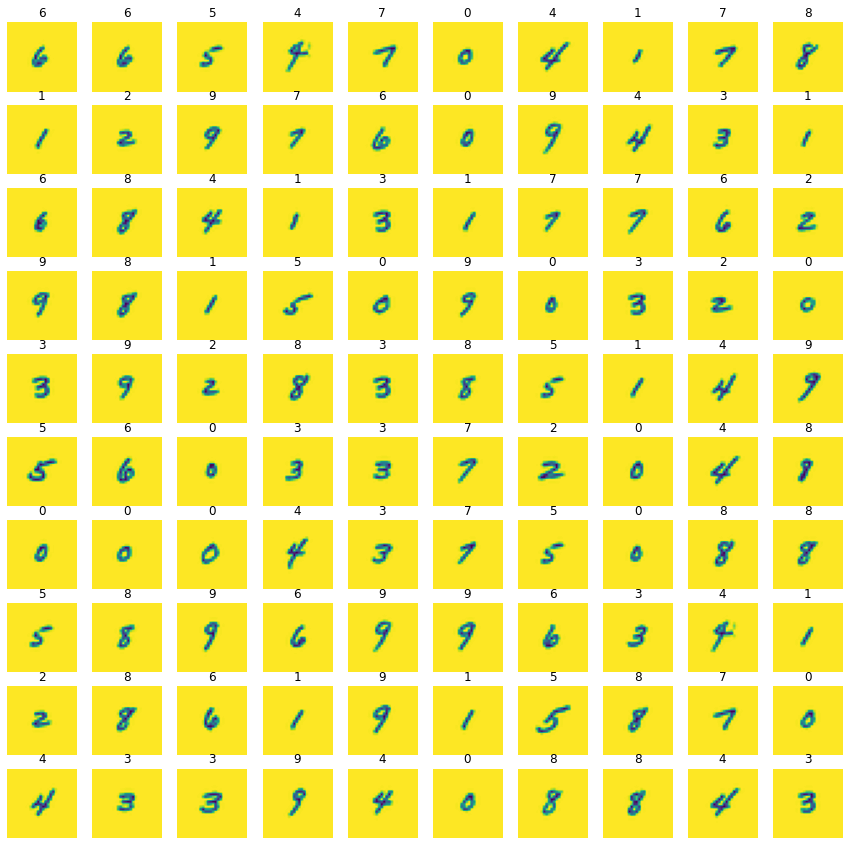

In [7]:
d0 = file[writers[0]]
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):
    for j in range(10):
        id = np.random.randint(len(d0["labels"]))
        axs[i, j].imshow(d0["images"][id])
        axs[i, j].axis("off")
        axs[i, j].set_title(d0["labels"][id]-30)
plt.show()

# Explore datasets containing all characters [0-0A-Za-z]

datasets contains images from 3597 writers


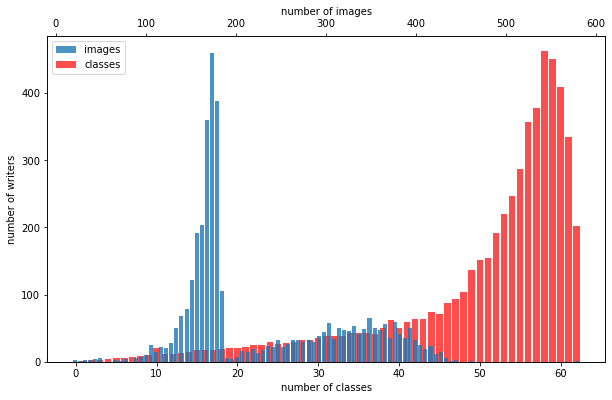

In [35]:
import h5py
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


path = 'path_to_your_write_all.hdf5'
file = h5py.File(path, "r")

writers = sorted(file.keys())
print(f'datasets contains images from {len(writers)} writers')

img_count = []
cla_count = list(range(63))
for writer in writers:
    images = file[writer]['images'][:]
    labels = file[writer]['labels'][:]
    img_count.append(images.shape[0])
    cla_count[len(np.unique(labels))] += 1

fig, ax0 = plt.subplots(figsize=(10, 6))
ax0.bar(range(len(cla_count)), cla_count, color='r', alpha=0.7, label='classes')
ax0.set_xlabel('number of classes')

ax1 = ax0.twiny()
ax1.hist(img_count, bins=100, alpha=0.8, rwidth=0.8, label='images')
ax1.set_xlabel('number of images')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax0.get_legend_handles_labels()
ax0.legend(h1+h2, l1+l2, loc=2)
ax0.set_ylabel('number of writers')

fig.show()

In [28]:
cla_count

63